### Numpy array vs Python lists

In [1]:
# speed
# list
a = [i for i in range(10000000)]
b = [i for i in range(10000000,20000000)]

c = []
import time

start = time.time()
for i in range(len(a)):
  c.append(a[i] + b[i])
print(time.time()-start)

0.5770828723907471


In [2]:
# numpy
import numpy as np
a = np.arange(10000000)
b = np.arange(10000000,20000000)

start = time.time()
c = a + b
print(time.time()-start)

0.049226999282836914


In [ ]:
3.26/0.06

54.33333333333333

In [ ]:
# memory
a = [i for i in range(10000000)]
import sys

sys.getsizeof(a)

81528048

In [ ]:
a = np.arange(10000000,dtype=np.int8)
sys.getsizeof(a)

10000104

In [ ]:
# convenience

### Advanced Indexing

In [ ]:
# Normal Indexing and slicing

a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [ ]:
a[1,2]

5

In [ ]:
a[1:3,1:3]

array([[4, 5],
       [7, 8]])

In [ ]:
# Fancy Indexing

a[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

In [6]:
# Boolean Indexing
a = np.random.randint(1,100,24).reshape(6,4)
a

array([[77, 69, 45, 36],
       [ 7, 21, 20, 63],
       [59, 34, 48, 28],
       [27, 76, 78, 21],
       [ 1, 28, 58, 18],
       [33, 45, 99, 75]])

In [12]:
a[(a % 2 ==0) & (a>50)] 

array([76, 78, 58])

In [14]:
a[~(a%7==0)]

array([69, 45, 36, 20, 59, 34, 48, 27, 76, 78,  1, 58, 18, 33, 45, 99, 75])

In [ ]:
# find all numbers greater than 50
a[a > 50]

array([76, 98, 99, 91, 88, 83, 78, 85, 54, 73, 61, 53, 93, 85, 77])

In [ ]:
# find out even numbers
a[a % 2 == 0]

array([76, 98, 46, 88,  6, 78, 54, 40])

In [ ]:
# find all numbers greater than 50 and are even

a[(a > 50) & (a % 2 == 0)]

ValueError: ignored

In [ ]:
# find all numbers not divisible by 7
a[~(a % 7 == 0)]

array([76, 99, 39, 46, 88, 23, 45,  6, 83,  1, 37, 43, 78, 85, 54, 73, 61,
       53, 40, 93, 85])

### Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [15]:
# same shape
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  8 10]
 [12 14 16]]


In [16]:
# diff shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [ ]:
# More examples

a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [ ]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: ignored

In [ ]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [17]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print(b)

print(a + b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [18]:
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print(b)

print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [19]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [20]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

### Working with mathematical formulas

In [ ]:
a = np.arange(10)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [ ]:
# sigmoid
def sigmoid(array):
  return 1/(1 + np.exp(-(array)))


a = np.arange(100)

sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [21]:
# mean squared error

actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

In [24]:
actual

array([46, 19, 30, 23, 44,  8, 17, 31, 34, 42, 44, 28,  6, 13, 22, 34, 48,
       44, 40, 13, 30, 38, 14, 47, 38])

In [25]:
predicted

array([ 5, 44, 45, 19,  9, 14, 22, 24, 45, 10, 32, 20, 45,  9, 35,  7, 11,
        8, 38, 20, 21, 22, 26, 41, 34])

In [28]:
def mse(actual,predicted):
  return np.mean((actual - predicted)**2)

mse(actual,predicted)

np.float64(436.84)

In [ ]:
# binary cross entropy
np.mean((actual - predicted)**2)

500.12

### Working with missing values

In [29]:
# Working with missing values -> np.nan
a = np.array([1,2,3,4,np.nan,6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [30]:
np.isnan(a)

array([False, False, False, False,  True, False])

In [ ]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6.])

### Plotting Graphs

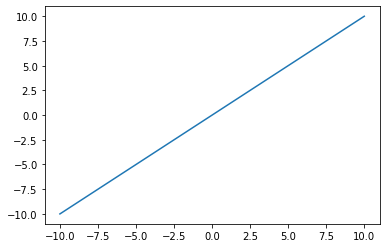

In [ ]:
# plotting a 2D plot
# x = y
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = x

plt.plot(x,y)

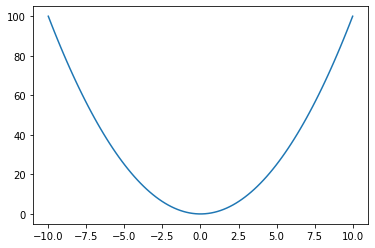

In [ ]:
# y = x^2
x = np.linspace(-10,10,100)
y = x**2

plt.plot(x,y)

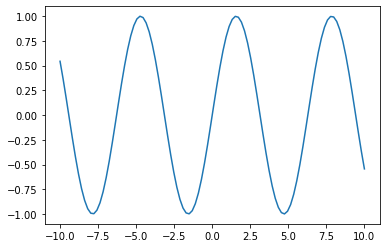

In [ ]:
# y = sin(x)
x = np.linspace(-10,10,100)
y = np.sin(x)

plt.plot(x,y)

<ipython-input-137-4b3958c08378>:3: RuntimeWarning: invalid value encountered in log
  y = x * np.log(x)


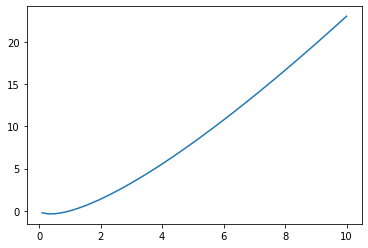

In [ ]:
# y = xlog(x)
x = np.linspace(-10,10,100)
y = x * np.log(x)

plt.plot(x,y)

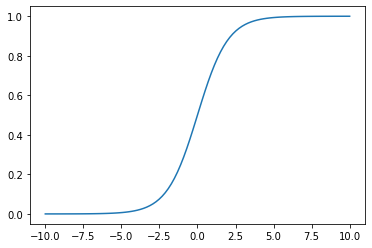

In [ ]:
# sigmoid
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))

plt.plot(x,y)

### Meshgrids

In [ ]:
# Meshgrids

plt.plot() mein x aur y parameters ye hote hain:

  X parameter:

  - Type: numpy array, list, ya sequence of numbers
  - Purpose: Horizontal axis (x-axis) ke values
  - Example: [1, 2, 3, 4, 5] ya np.linspace(0, 10, 100)

  Y parameter:

  - Type: numpy array, list, ya sequence of numbers
  - Purpose: Vertical axis (y-axis) ke values
  - Example: [2, 4, 6, 8, 10] ya np.sin(x)

  Important points:

  - X aur Y ka size same hona chahiye - agar x mein 100 points hain to y mein bhi 100 hone chahiye
  - X optional hai - agar sirf y doge to automatic index numbers use honge (0, 1, 2, 3...)
  - Multiple lines ke liye multiple x,y pairs de sakte ho: plt.plot(x1, y1, x2, y2)

  Basically, har x[i] value correspond karta hai y[i] value se, aur ye points connect hokar line banate hain.

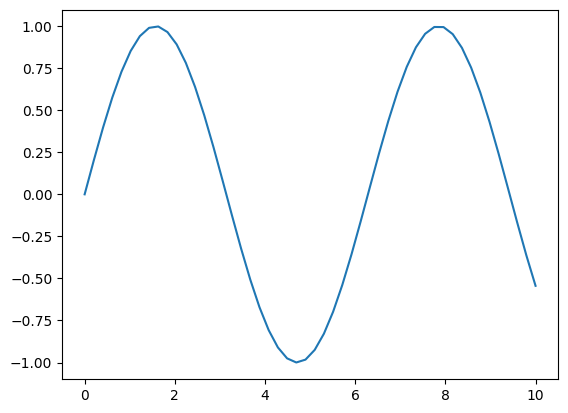

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Basic plot with x and y data
x = np.linspace(0, 10, 50)
y = np.sin(x)

# Sabse simple plot
plt.plot(x, y)
plt.show()


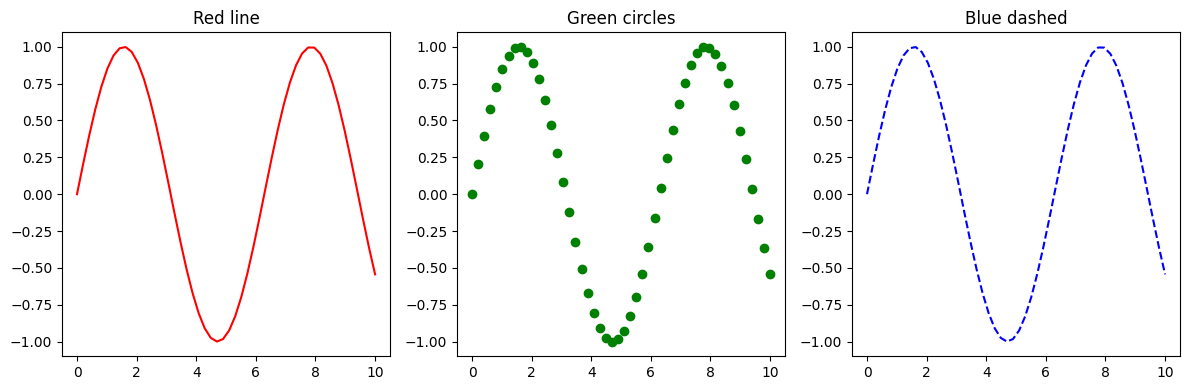

In [34]:
# Format string ke saath - color, marker, line style
plt.figure(figsize=(12, 4))

# Subplot 1 - Different colors
plt.subplot(1, 3, 1)
plt.plot(x, y, 'r')  # red color
plt.title("Red line")

# Subplot 2 - Markers
plt.subplot(1, 3, 2) 
plt.plot(x, y, 'go')  # green circles
plt.title("Green circles")

# Subplot 3 - Line styles
plt.subplot(1, 3, 3)
plt.plot(x, y, 'b--')  # blue dashed line
plt.title("Blue dashed")

plt.tight_layout()
plt.show()

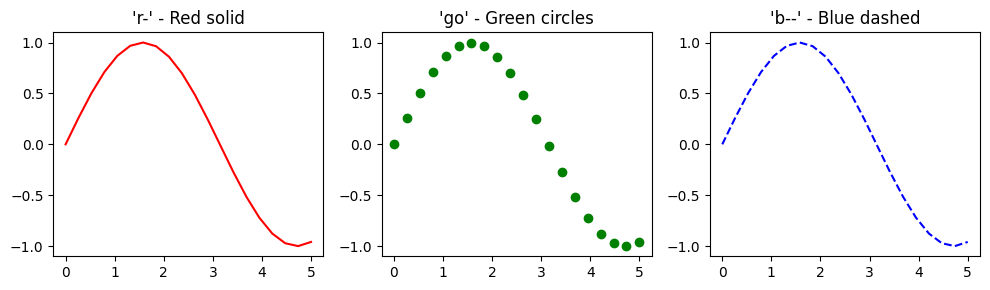

In [35]:
# Format string ke examples
plt.figure(figsize=(10, 3))

# Different format strings
x = np.linspace(0, 5, 20)
y = np.sin(x)

plt.subplot(1, 3, 1)
plt.plot(x, y, 'r-')  # red solid line
plt.title("'r-' - Red solid")

plt.subplot(1, 3, 2) 
plt.plot(x, y, 'go')  # green circles
plt.title("'go' - Green circles")

plt.subplot(1, 3, 3)
plt.plot(x, y, 'b--')  # blue dashed
plt.title("'b--' - Blue dashed")

plt.tight_layout()
plt.show()

Grid lines show karne ke liye sirf plt.grid(True) add kar do existing code mein:

  plt.plot(x, y)
  plt.grid(True)  # Ye line add karo
  plt.show()

  Grid customization options:
  - plt.grid(True) - basic grid
  - plt.grid(True, alpha=0.3) - light grid
  - plt.grid(True, linestyle='--') - dashed grid
  - plt.grid(True, color='gray') - gray color grid

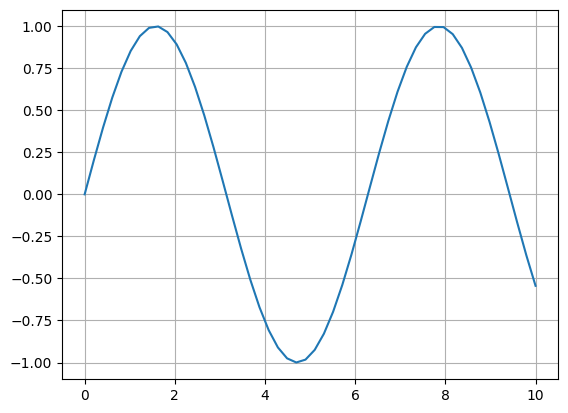

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Basic plot with x and y data
x = np.linspace(0, 10, 50)
y = np.sin(x)

# Sabse simple plot
plt.plot(x, y)
plt.grid(True)  # Grid lines add karna
plt.show()